In [1]:
#Import necessary libraries
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
#Fetching data from the URL
url = 'https://archive.org/metadata/TheAdventuresOfTomSawyer_201303'
result = requests.get(url)

In [3]:
#Checking data output
print(result.text)

{"alternate_locations":{"servers":[{"server":"dn790006.ca.archive.org","dir":"/0/items/TheAdventuresOfTomSawyer_201303"}],"workable":[{"server":"dn790006.ca.archive.org","dir":"/0/items/TheAdventuresOfTomSawyer_201303"}]},"created":1689703115,"d1":"ia600403.us.archive.org","d2":"ia800403.us.archive.org","dir":"/8/items/TheAdventuresOfTomSawyer_201303","files":[{"name":"The Adventures of Tom Sawyer.djvu","source":"derivative","format":"DjVu","original":"The Adventures of Tom Sawyer_djvu.xml","mtime":"1362417954","size":"7566731","md5":"7e6193a4699a1e01dba909ba2e151da8","crc32":"43d5da8f","sha1":"ea55bbf112993a7e86ac994631d12f5050ee6434"},{"name":"The Adventures of Tom Sawyer.gif","source":"derivative","format":"Animated GIF","original":"The Adventures of Tom Sawyer_jp2.zip","mtime":"1362414413","size":"222532","md5":"03264a33dbfafb2f6d9c4883bcc4e714","crc32":"1c03e54b","sha1":"41e317c3f5ff2a2bb2d4cf9695715ec375a699d3"},{"name":"The Adventures of Tom Sawyer.pdf","source":"original","form

In [4]:
print(type(result))

<class 'requests.models.Response'>


In [5]:
data = json.loads(result.text)
print(data)

{'alternate_locations': {'servers': [{'server': 'dn790006.ca.archive.org', 'dir': '/0/items/TheAdventuresOfTomSawyer_201303'}], 'workable': [{'server': 'dn790006.ca.archive.org', 'dir': '/0/items/TheAdventuresOfTomSawyer_201303'}]}, 'created': 1689703115, 'd1': 'ia600403.us.archive.org', 'd2': 'ia800403.us.archive.org', 'dir': '/8/items/TheAdventuresOfTomSawyer_201303', 'files': [{'name': 'The Adventures of Tom Sawyer.djvu', 'source': 'derivative', 'format': 'DjVu', 'original': 'The Adventures of Tom Sawyer_djvu.xml', 'mtime': '1362417954', 'size': '7566731', 'md5': '7e6193a4699a1e01dba909ba2e151da8', 'crc32': '43d5da8f', 'sha1': 'ea55bbf112993a7e86ac994631d12f5050ee6434'}, {'name': 'The Adventures of Tom Sawyer.gif', 'source': 'derivative', 'format': 'Animated GIF', 'original': 'The Adventures of Tom Sawyer_jp2.zip', 'mtime': '1362414413', 'size': '222532', 'md5': '03264a33dbfafb2f6d9c4883bcc4e714', 'crc32': '1c03e54b', 'sha1': '41e317c3f5ff2a2bb2d4cf9695715ec375a699d3'}, {'name': 'Th

In [6]:
# Print the keys available in the data
print(data.keys())

# Print the metadata of the item
print(json.dumps(data['metadata'], indent=4))

dict_keys(['alternate_locations', 'created', 'd1', 'd2', 'dir', 'files', 'files_count', 'item_last_updated', 'item_size', 'metadata', 'reviews', 'server', 'uniq', 'workable_servers'])
{
    "identifier": "TheAdventuresOfTomSawyer_201303",
    "mediatype": "texts",
    "description": "The story of Tom Sawyer, a young man who is an expert at getting what he wants. But when Tom and his best friend Huck stumble onto murderers and thieves, their lives will never be the same.\nSuggested Reading Level: UP (Upper Primary)",
    "language": "eng",
    "scanner": "Internet Archive HTML5 Uploader 1.2",
    "title": "The Adventures Of Tom Sawyer",
    "publicdate": "2013-03-04 15:53:47",
    "uploader": "richard.rowe@ole.org",
    "addeddate": "2013-03-04 15:53:47",
    "identifier-access": "http://archive.org/details/TheAdventuresOfTomSawyer_201303",
    "identifier-ark": "ark:/13960/t6k08f201",
    "ppi": "600",
    "ocr": "ABBYY FineReader 8.0",
    "repub_state": "4",
    "creator": "Twain, Ma

In [7]:
#Accessing the title of the item
title = data['metadata']['title']
print(f"Title: {title}")

# Accessing the collection
collection = data['metadata']['collection']
print(f"Collection: {collection}")

Title: The Adventures Of Tom Sawyer
Collection: ['bell_literature', 'bell', 'additional_collections']


In [8]:
dataset = data['files']
print(dataset)

[{'name': 'The Adventures of Tom Sawyer.djvu', 'source': 'derivative', 'format': 'DjVu', 'original': 'The Adventures of Tom Sawyer_djvu.xml', 'mtime': '1362417954', 'size': '7566731', 'md5': '7e6193a4699a1e01dba909ba2e151da8', 'crc32': '43d5da8f', 'sha1': 'ea55bbf112993a7e86ac994631d12f5050ee6434'}, {'name': 'The Adventures of Tom Sawyer.gif', 'source': 'derivative', 'format': 'Animated GIF', 'original': 'The Adventures of Tom Sawyer_jp2.zip', 'mtime': '1362414413', 'size': '222532', 'md5': '03264a33dbfafb2f6d9c4883bcc4e714', 'crc32': '1c03e54b', 'sha1': '41e317c3f5ff2a2bb2d4cf9695715ec375a699d3'}, {'name': 'The Adventures of Tom Sawyer.pdf', 'source': 'original', 'format': 'Text PDF', 'mtime': '1362412426', 'size': '14731016', 'md5': '06c730d44a5046a7756f88f177515eec', 'crc32': 'ce64be45', 'sha1': '9595045ac41eab38b66f0535e2ed1e9b04632941'}, {'name': 'The Adventures of Tom Sawyer.pdf_meta.txt', 'source': 'original', 'format': 'Metadata', 'mtime': '1362412427', 'size': '1425', 'md5': '

In [9]:
#Convert data to DataFrame
data_df = pd.DataFrame(data['files'])

In [10]:
#Count the occurrences of each 'format'
format_counts = data_df['format'].value_counts()
print(format_counts)

Metadata                         5
DjVu                             1
Animated GIF                     1
Text PDF                         1
Abbyy GZ                         1
DjVuTXT                          1
Djvu XML                         1
Single Page Processed JP2 ZIP    1
Scandata                         1
Archive BitTorrent               1
Item Tile                        1
Name: format, dtype: int64


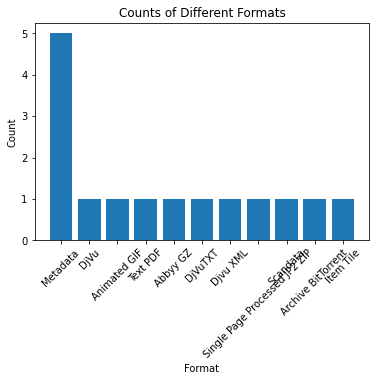

In [11]:
# Plotting the format counts as a bar chart
plt.bar(format_counts.index, format_counts.values)
plt.xlabel('Format')
plt.ylabel('Count')
plt.title('Counts of Different Formats')
plt.xticks(rotation=45)
plt.show()